<a href="https://colab.research.google.com/github/Sasi0026/DeepLearning/blob/main/RL_MAB_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Project Overview:</h1><h1> Recomendation System</h1>


<h2>Set Up the Environment</h2>

install all the required libraries

Get Googlenewsapi key or the googlenew python library

In [ ]:
#  import openaigym

!pip install gym
import gym


In [ ]:
!pip install GoogleNews
from GoogleNews import GoogleNews

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 4.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# initialize google news object
googlenews=GoogleNews(lang='en')

2.Fetch News Articles

In [ ]:
#fetch news articles

# Define user interests (for simulation purposes)
user_interests = ['AI', 'Healthcare', 'Finance']

def fetch_news_articles():
    for topic in user_interests:
        googlenews.search(topic)

        articles = googlenews.results(sort=True)
    df = pd.DataFrame(articles)
    df['engagement_prob'] = np.random.rand(len(df))
    return df

df = fetch_news_articles()



In [ ]:
df.head()

,title,media,date,datetime,desc,link,img,engagement_prob
0,"Piramal Finance clocks Rs 50,000 crore retail ...",The Economic Times,0 minutes ago,2024-06-18 15:10:06.429395,Piramal Capital & Housing Finance announced th...,https://economictimes.indiatimes.com/industry/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.451212
1,"Finance – June 18, 2024 | In Committee from th...",CPAC,0 minutes ago,2024-06-18 15:10:06.420922,CPAC brings viewers a detailed examination of ...,https://www.cpac.ca/in-committee-from-the-hous...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.339467
2,Vital Founder Aaron Patzer Honored as Slice of...,Business Wire,0 minutes ago,2024-06-18 15:10:05.904076,Vital Software Co-Founder and CEO Aaron Patzer...,https://www.businesswire.com/news/home/2024061...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.918788
3,Treating heatwaves as health care emergency,Hindustan Times,1 minutes ago,2024-06-18 15:09:05.909705,Record-breaking heat in 2024 may soon be surpa...,https://www.hindustantimes.com/opinion/treatin...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.598881
4,Matrix Providers to Fill 67 Healthcare Positio...,Dentistry Today,2 minutes ago,2024-06-18 15:08:05.919976,"Matrix Providers, a prominent medical staffing...",https://www.dentistrytoday.com/matrix-provider...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.256584


In [ ]:
class NewsArticleEnv(gym.Env):
    def __init__(self, articles, user_interests):
        super(NewsArticleEnv, self).__init__()
        self.articles = articles
        self.user_interests = user_interests
        self.n_articles = len(articles)
        self.action_space = gym.spaces.Discrete(self.n_articles)
        self.observation_space = gym.spaces.Discrete(1)
        self.current_step = 0

    def reset(self):
        self.current_step = 0
        return 0

    def step(self, action):
        action = int(action)
        reward = np.random.binomial(1, self.articles.iloc[action]['engagement_prob'])
        self.current_step += 1
        done = self.current_step >= self.n_articles
        return 0, reward, done, {}

    def render(self):
        pass



# Create the environment
env = NewsArticleEnv(df, user_interests)


In [ ]:
#Epsilon-Greedy method for Agent A
def epsilon_greedy(epsilon, Q):
    if np.random.rand() < epsilon:
        return np.random.randint(len(Q))
    else:
        return np.argmax(Q)


In [ ]:
#Simulate user selection based on user interests.

def agentB_select_article(top_articles, user_interests):
    return np.random.choice(top_articles)

 <h2>Training Loop</h2>
Include both agents in the training loop and print selected articles at intervals.

Episode 100
Selected Article: Financial innovation and fintech in corporate finance
Link: https://thebftonline.com/2024/06/18/financial-innovation-and-fintech-in-corporate-finance/&ved=2ahUKEwi7o9DQt-WGAxXhNzQIHfMUAGcQxfQBegQIABAC&usg=AOvVaw1kFDS0ylzPFL5YMmSH9hcs
Date: 6 minutes ago
Media: The Business & Financial Times
Engagement Probability: 0.5392091428919363

Episode 200
Selected Article: Google DeepMind's new AI tool uses video pixels and text prompts to generate soundtracks
Link: https://www.theverge.com/2024/6/18/24180854/google-deepmind-ai-video-pixels-text-prompts-generate-video-soundtracks&ved=2ahUKEwjSgs7Ot-WGAxWKHDQIHVKuCGcQxfQBegQIAxAC&usg=AOvVaw2p13LCj_vCxOdzjwmv2-Q6
Date: 2 hours ago
Media: The Verge
Engagement Probability: 0.46374259655449235

Episode 300
Selected Article: Financial innovation and fintech in corporate finance
Link: https://thebftonline.com/2024/06/18/financial-innovation-and-fintech-in-corporate-finance/&ved=2ahUKEwi7o9DQt-WGAxXhNzQIHfMUAGcQxfQBegQIABAC

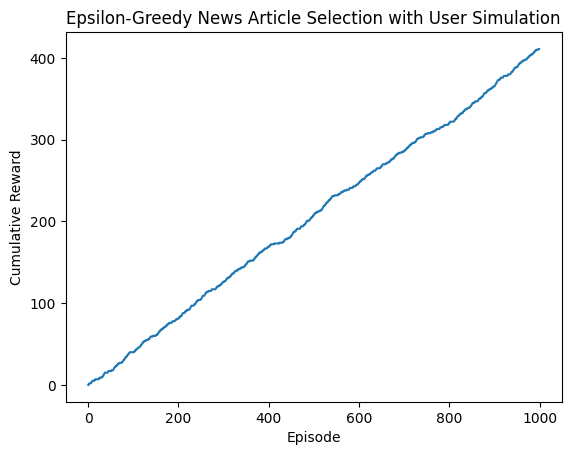

In [ ]:
# Parameters
n_episodes = 1000
epsilon = 0.1
Q = np.zeros(env.n_articles)
n_actions = np.zeros(env.n_articles)
rewards = np.zeros(n_episodes)

# Training loop
for i in range(n_episodes):
    # Agent A: Recommend articles
    top_articles = np.argsort(Q)[-10:][::-1]

    # Agent B: Simulate user selection
    selected_action = agentB_select_article(top_articles, user_interests)

    # Environment step
    _, reward, _, _ = env.step(selected_action)

    rewards[i] = reward
    n_actions[selected_action] += 1
    Q[selected_action] += (reward - Q[selected_action]) / n_actions[selected_action]

    # Print selected article details every 100 episodes
    if (i + 1) % 100 == 0:
        selected_article = df.iloc[selected_action]
        print(f"Episode {i+1}")
        print(f"Selected Article: {selected_article['title']}")
        print(f"Link: {selected_article['link']}")
        print(f"Date: {selected_article['date']}")
        print(f"Media: {selected_article['media']}")
        print(f"Engagement Probability: {selected_article['engagement_prob']}\n")

# Plot results
plt.plot(np.cumsum(rewards))
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Epsilon-Greedy News Article Selection with User Simulation')
plt.show()


Episode 100
Top 5 Articles Suggested by Agent A:
Rank 1:
Title: Shawbrook to acquire motor finance lender JBR Auto Holdings
Rank 2:
Title: We're trimming an AI winner and putting some of the proceeds into a data center power play
Rank 3:
Title: Google DeepMind's new AI tool uses video pixels and text prompts to generate soundtracks
Rank 4:
Title: Emory Healthcare giving out more than $100 million in raises to employees this year
Rank 5:
Title: Financial innovation and fintech in corporate finance
Article Selected by Agent B:
Selected Article: Shawbrook to acquire motor finance lender JBR Auto Holdings
Link: https://www.motorfinanceonline.com/news/shawbrook-acquire-motor-finance-jbr/&ved=2ahUKEwi7o9DQt-WGAxXhNzQIHfMUAGcQxfQBegQIBxAC&usg=AOvVaw3EZ0P9AV2Pg7bw71blFkJ3
Date: 6 minutes ago
Media: Motor Finance Online
Engagement Probability: 0.9491305076926748

Episode 200
Top 5 Articles Suggested by Agent A:
Rank 1:
Title: Shawbrook to acquire motor finance lender JBR Auto Holdings
Rank 2:
T

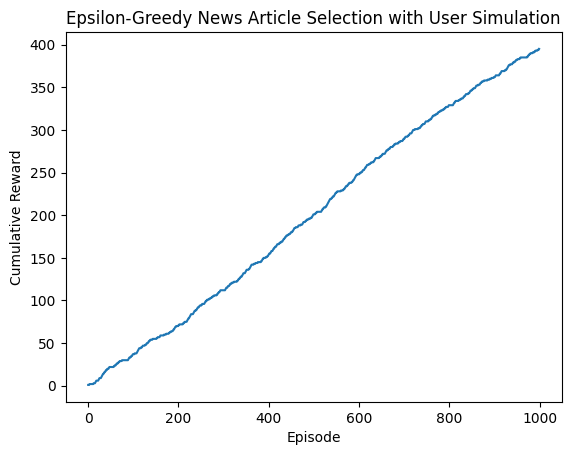

In [ ]:
# Parameters
n_episodes = 1000
epsilon = 0.1
Q = np.zeros(env.n_articles)
n_actions = np.zeros(env.n_articles)
rewards = np.zeros(n_episodes)

# Training loop
for i in range(n_episodes):
    # Agent A: Recommend articles
    top_articles = np.argsort(Q)[-10:][::-1]

    # Print top 5 articles suggested by Agent A
    if (i + 1) % 100 == 0:
        print(f"Episode {i+1}")
        print("Top 5 Articles Suggested by Agent A:")
        for rank, idx in enumerate(top_articles[:5], start=1):
            article = df.iloc[idx]
            print(f"Rank {rank}:")
            print(f"Title: {article['title']}")
            #print(f"Link: {article['link']}")
            #print(f"Date: {article['date']}")
            #print(f"Media: {article['media']}")
            #print(f"Engagement Probability: {article['engagement_prob']}\n")

    # Agent B: Simulate user selection
    selected_action = agentB_select_article(top_articles, user_interests)

    # Environment step
    _, reward, _, _ = env.step(selected_action)

    rewards[i] = reward
    n_actions[selected_action] += 1
    Q[selected_action] += (reward - Q[selected_action]) / n_actions[selected_action]

    # Print selected article details every 100 episodes
    if (i + 1) % 100 == 0:
        selected_article = df.iloc[selected_action]
        print(f"Article Selected by Agent B:")
        print(f"Selected Article: {selected_article['title']}")
        print(f"Link: {selected_article['link']}")
        print(f"Date: {selected_article['date']}")
        print(f"Media: {selected_article['media']}")
        print(f"Engagement Probability: {selected_article['engagement_prob']}\n")

# Plot results
plt.plot(np.cumsum(rewards))
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Epsilon-Greedy News Article Selection with User Simulation')
plt.show()


╔══════════════════════════════════════════════════════════╗
║ Article Selected by Agent B                                                 ║
╠══════════════════════════════════════════════════════════╣
║ Title: China channels more urban medical resources to lower-level healthcare units                                  ║
║ Link: https://english.news.cn/20240618/f37d57720c2a4022947336e94eed4a4e/c.html&ved=2ahUKEwilmrDQt-WGAxWfOjQIHVPEAGYQxfQBegQIAxAC&usg=AOvVaw15p0fwjP_12ZcWtFnYOK3R                                    ║
║ Date: 7 minutes ago                                    ║
║ Media: Xinhua                                  ║
║ Engagement Probability: 0.3516   ║
╚══════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════════════════╗
║ Article Selected by Agent B                                                 ║
╠══════════════════════════════════════════════════════════╣
║ Title: Media Council condemns assault, arrest of journalists dur

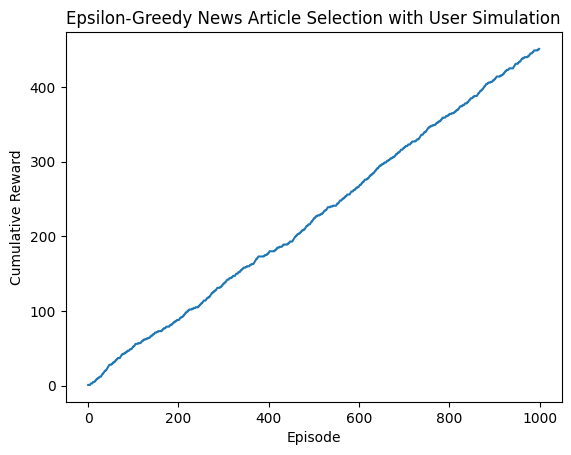

In [ ]:
# Parameters
n_episodes = 1000
epsilon = 0.1
Q = np.zeros(env.n_articles)
n_actions = np.zeros(env.n_articles)
rewards = np.zeros(n_episodes)

def print_boxed_article(rank, article, title="Article"):
    print("╔══════════════════════════════════════════════════════════╗")
    print(f"║ {title} {rank}                                                ║")
    print("╠══════════════════════════════════════════════════════════╣")
    print(f"║ Title: {article['title']}                                  ║")
    print(f"║ Link: {article['link']}                                    ║")
    print(f"║ Date: {article['date']}                                    ║")
    print(f"║ Media: {article['media']}                                  ║")
    print(f"║ Engagement Probability: {article['engagement_prob']:.4f}   ║")
    print("╚══════════════════════════════════════════════════════════╝\n")

# Training loop
for i in range(n_episodes):
    # Agent A: Recommend articles
    top_articles = np.argsort(Q)[-10:][::-1]

    # Print top 5 articles suggested by Agent A
    if (i + 1) % 300 == 0:
        print(f"Episode {i+1}")
        print("Top 5 Articles Suggested by Agent A:")
        for rank, idx in enumerate(top_articles[:5], start=1):
            article = df.iloc[idx]
            print_boxed_article(rank, article, title="Suggested Article")

    # Agent B: Simulate user selection
    selected_action = agentB_select_article(top_articles, user_interests)

    # Environment step
    _, reward, _, _ = env.step(selected_action)

    rewards[i] = reward
    n_actions[selected_action] += 1
    Q[selected_action] += (reward - Q[selected_action]) / n_actions[selected_action]

    # Print selected article details every 100 episodes
    if (i + 1) % 100 == 0:
        selected_article = df.iloc[selected_action]
        print_boxed_article("", selected_article, title="Article Selected by Agent B")

# Plot results
plt.plot(np.cumsum(rewards))
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Epsilon-Greedy News Article Selection with User Simulation')
plt.show()


Episode 100
Top 5 Articles Suggested by Agent A:
13    Shawbrook to acquire motor finance lender JBR ...
15    Wetin bin dey di Finance Bill wey cause kasala...
10    CalPERS enters into contracts with Blue Shield...
14    Financial innovation and fintech in corporate ...
39    Google DeepMind's new AI tool uses video pixel...
Name: title, dtype: object 13              Motor Finance Online
15                               BBC
10           Healthcare Finance News
14    The Business & Financial Times
39                         The Verge
Name: media, dtype: object


╔══════════════════════════════════════════════════════════╗
║ Selected Article                                                 ║
╠══════════════════════════════════════════════════════════╣
║ Title: Media Council condemns assault, arrest of journalists during anti-Finance Bill demos                                ║
║ Link: https://www.citizen.digital/news/media-council-condemns-assault-arrest-of-journalists-during-anti-financ

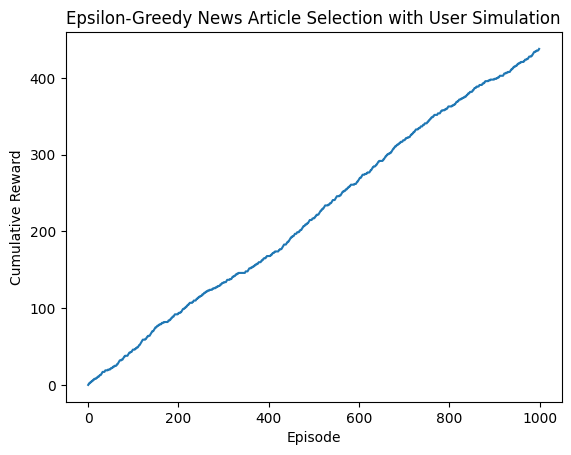

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the environment and other necessary setups are already defined.

# Parameters
n_episodes = 1000
epsilon = 0.1
Q = np.zeros(env.n_articles)
n_actions = np.zeros(env.n_articles)
rewards = np.zeros(n_episodes)

def print_boxed_article(article, title="Selected Article"):
    print("╔══════════════════════════════════════════════════════════╗")
    print(f"║ {title}                                                 ║")
    print("╠══════════════════════════════════════════════════════════╣")
    print(f"║ Title: {article['title']}                                ║")
    print(f"║ Link: {article['link']}                                  ║")
    print(f"║ Date: {article['date']}                                  ║")
    print(f"║ Media: {article['media']}                                ║")
    print(f"║ Engagement Probability: {article['engagement_prob']:.4f} ║")
    print("╚══════════════════════════════════════════════════════════╝\n")

# Training loop
for i in range(n_episodes):
    # Agent A: Recommend articles
    top_articles = np.argsort(Q)[-10:][::-1]

    # Print top 5 articles suggested by Agent A
    if (i + 1) % 100 == 0:
        print(f"Episode {i+1}")
        print("Top 5 Articles Suggested by Agent A:")
        top_5_articles = df.iloc[top_articles[:5]][['title', 'link', 'date', 'media', 'engagement_prob']]

        print(top_5_articles['title'],top_5_articles['media'])
        #print(top_5_articles.to_string(index=False))
        print("\n")

    # Agent B: Simulate user selection
    selected_action = agentB_select_article(top_articles, user_interests)

    # Environment step
    _, reward, _, _ = env.step(selected_action)

    rewards[i] = reward
    n_actions[selected_action] += 1
    Q[selected_action] += (reward - Q[selected_action]) / n_actions[selected_action]

    # Print selected article details every 100 episodes
    if (i + 1) % 100 == 0:
        selected_article = df.iloc[selected_action]
        print_boxed_article(selected_article)

# Plot results
plt.plot(np.cumsum(rewards))
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Epsilon-Greedy News Article Selection with User Simulation')
plt.show()

Episode 100
Top 5 Articles Suggested by Agent A:
                                                                                                                                       title                                                                                                                                                                                                                  link          date           media  engagement_prob
                                                            General Election live: Sunak set to be first sitting PM to lose seat, poll finds              https://www.independent.co.uk/news/uk/politics/general-election-2024-sunak-starmer-reform-snp-manifesto-b2565089.html&ved=2ahUKEwjo4oSusemGAxXdQjABHa_eAkgQxfQBegQIBBAC&usg=AOvVaw2UsUAcUGsRL4nPGVzx0gAR    1 hour ago The Independent         0.088727
                                                                                        Darshan’s wife questioned in Renukaswamy murder case       

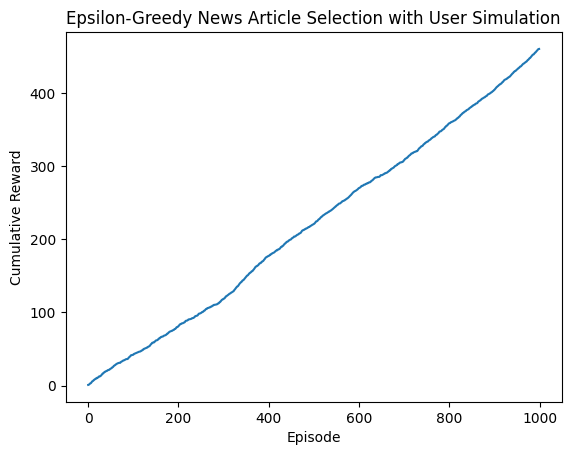

In [ ]:
# new experiment
import pandas as pd
import numpy as np
from GoogleNews import GoogleNews
import random
import matplotlib.pyplot as plt

def fetch_news_articles():
    googlenews = GoogleNews()
    googlenews.search('latest news')
    articles = googlenews.results(sort=True)
    df = pd.DataFrame(articles)
    df['engagement_prob'] = np.random.rand(len(df))
    return df

class NewsArticleEnv:
    def __init__(self, df, user_interests):
        self.df = df
        self.user_interests = user_interests
        self.n_articles = len(df)

    def step(self, action):
        article = self.df.iloc[action]
        reward = article['engagement_prob']
        return self.df.iloc[action], reward

    def update_articles(self, new_df):
        self.df = new_df
        self.n_articles = len(new_df)

def agentB_select_article(top_articles, user_interests):
    probabilities = [random.random() for _ in top_articles]
    selected_index = np.argmax(probabilities)
    return top_articles[selected_index]

def print_boxed_article(article):
    print("+" + "-"*100 + "+")
    print(f"| Title: {article['title'][:98]:<98} |")
    print(f"| Link: {article['link'][:98]:<98} |")
    print(f"| Date: {article['date']:<98} |")
    print(f"| Media: {article['media']:<98} |")
    print(f"| Engagement Probability: {article['engagement_prob']:<98.2f} |")
    print("+" + "-"*100 + "+")

# Parameters
n_episodes = 1000
epsilon = 0.1
user_interests = ['AI', 'Finance', 'Health']

# Initialize environment and Q-values
df = fetch_news_articles()
env = NewsArticleEnv(df, user_interests)
Q = np.zeros(env.n_articles)
n_actions = np.zeros(env.n_articles)
rewards = np.zeros(n_episodes)

# Training loop
for i in range(n_episodes):
    if (i + 1) % 100 == 0:
        new_df = fetch_news_articles()
        env.update_articles(new_df)
        df = new_df
        Q = np.zeros(env.n_articles)
        n_actions = np.zeros(env.n_articles)

    top_articles = np.argsort(Q)[-10:][::-1]

    if (i + 1) % 100 == 0:
        print(f"Episode {i+1}")
        print("Top 5 Articles Suggested by Agent A:")
        top_5_articles = df.iloc[top_articles[:5]][['title', 'link', 'date', 'media', 'engagement_prob']]
        print(top_5_articles.to_string(index=False))
        print("\n")

    selected_action = agentB_select_article(top_articles, user_interests)
    _, reward = env.step(selected_action)

    rewards[i] = reward
    n_actions[selected_action] += 1
    Q[selected_action] += (reward - Q[selected_action]) / n_actions[selected_action]

    if (i + 1) % 100 == 0:
        selected_article = df.iloc[selected_action]
        print_boxed_article(selected_article)

plt.plot(np.cumsum(rewards))
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Epsilon-Greedy News Article Selection with User Simulation')
plt.show()

Episode 100
Top 5 Articles Suggested by Agent A:
                                                                                                                             title                                                                                                                                                                                                                  link        date           media  engagement_prob     type
                                                                              Darshan’s wife questioned in Renukaswamy murder case                 https://www.hindustantimes.com/india-news/darshans-wife-questioned-in-renukaswamy-murder-case-101718826850646.html&ved=2ahUKEwiSg4i2tumGAxUfQjABHW6HC58QxfQBegQIARAC&usg=AOvVaw3Y4ZEvlFFbOEUaBtOlteiZ 2 hours ago Hindustan Times         0.995841 Politics
                                                               Pawan Kalyan assumes office as Andhra Pradesh deputy chief minister https://www.hindustant

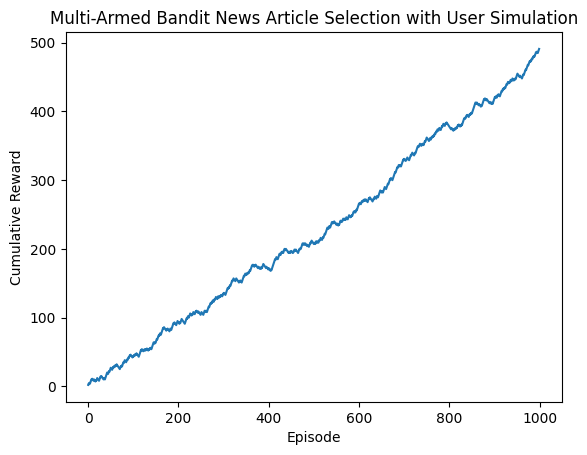

In [ ]:
import pandas as pd
import numpy as np
from GoogleNews import GoogleNews
import random
import matplotlib.pyplot as plt

# Fetch news articles
def fetch_news_articles():
    googlenews = GoogleNews()
    googlenews.search('latest news')
    articles = googlenews.results(sort=True)
    df = pd.DataFrame(articles)
    df['engagement_prob'] = np.random.rand(len(df))
    df['type'] = df['title'].apply(lambda x: random.choice(['Tech', 'Crime', 'Stock', 'Politics']))
    return df

# Environment
class NewsArticleEnv:
    def __init__(self, df, user_interests):
        self.df = df
        self.user_interests = user_interests
        self.n_articles = len(df)

    def step(self, action):
        article = self.df.iloc[action]
        reward = article['engagement_prob']
        return self.df.iloc[action], reward

    def update_articles(self, new_df):
        self.df = new_df
        self.n_articles = len(new_df)

def agentB_select_article(top_articles, user_interests):
    probabilities = [random.random() for _ in top_articles]
    selected_index = np.argmax(probabilities)
    return top_articles[selected_index]

def print_boxed_article(article):
    print("+" + "-"*100 + "+")
    print(f"| Title: {article['title'][:98]:<98} |")
    print(f"| Link: {article['link'][:98]:<98} |")
    print(f"| Date: {article['date']:<98} |")
    print(f"| Media: {article['media']:<98} |")
    print(f"| Engagement Probability: {article['engagement_prob']:<98.2f} |")
    print(f"| Type: {article['type']:<98} |")
    print("+" + "-"*100 + "+")

# Initialize
n_episodes = 1000
epsilon = 0.1
user_interests = ['AI', 'Finance', 'Health']
article_types = ['Tech', 'Crime', 'Stock', 'Politics']
Q = {atype: 0 for atype in article_types}
rewards = np.zeros(n_episodes)
action_history = []

# Fetch initial articles
df = fetch_news_articles()
env = NewsArticleEnv(df, user_interests)

# Training loop
for i in range(n_episodes):
    if (i + 1) % 100 == 0:
        new_df = fetch_news_articles()
        env.update_articles(new_df)
        df = new_df
        Q = {atype: 0 for atype in article_types}

    top_articles = np.argsort([Q[df.iloc[idx]['type']] for idx in range(len(df))])[-10:][::-1]

    if (i + 1) % 100 == 0:
        print(f"Episode {i+1}")
        print("Top 5 Articles Suggested by Agent A:")
        top_5_articles = df.iloc[top_articles[:5]][['title', 'link', 'date', 'media', 'engagement_prob', 'type']]
        print(top_5_articles.to_string(index=False))
        print("\n")

    selected_action = agentB_select_article(top_articles, user_interests)
    selected_article, reward = env.step(selected_action)

    # Assign rewards based on user selection
    if selected_action in top_articles[:5]:
        reward = 2
    else:
        reward = -1

    article_type = selected_article['type']
    action_history.append((article_type, reward))

    Q[article_type] += (reward - Q[article_type]) / (action_history.count((article_type, reward)) + 1)
    rewards[i] = reward

    if (i + 1) % 100 == 0:
        print_boxed_article(selected_article)

plt.plot(np.cumsum(rewards))
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Multi-Armed Bandit News Article Selection with User Simulation')
plt.show()

In [ ]:
df.shape

(10, 8)